Renewables - Time series Analysis

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
##task 2a

source='https://tubcloud.tu-berlin.de/s/nwCrNLrtL6LAN3W/download/time-series-lecture-2.csv'

data=pd.read_csv(source, index_col=0)
data.index= pd.to_datetime(data.index)
data

,load [GW],onwind [pu],offwind [pu],solar [pu],prices [€/MWh]
2015-01-01 00:00:00,41.151,0.1566,0.7030,0.0,NaN
2015-01-01 01:00:00,40.135,0.1659,0.6875,0.0,NaN
2015-01-01 02:00:00,39.106,0.1746,0.6535,0.0,NaN
2015-01-01 03:00:00,38.765,0.1745,0.6803,0.0,NaN
2015-01-01 04:00:00,38.941,0.1826,0.7272,0.0,NaN
...,...,...,...,...,...
2015-12-31 19:00:00,47.719,0.1388,0.4434,0.0,36.79
2015-12-31 20:00:00,45.911,0.1211,0.4023,0.0,28.81
2015-12-31 21:00:00,45.611,0.1082,0.4171,0.0,26.27
2015-12-31 22:00:00,43.762,0.1026,0.4716,0.0,29.99


In [52]:
##calculating the means , minimums and ,maxmimus fro the each colomn

mean= data.mean()
minimus=data.min()
maximus=data.max()
std_dev=data.std()
std_dev_col_max= std_dev.idxmax()
print("1)Mean",mean)
print("2)minimus",minimus)
print("3)maximus",maximus)
print("4)standard deviations", std_dev)
print(">>highest standard deviation coloumn is",std_dev_col_max)



1)Mean load [GW]         54.736992
onwind [pu]        0.205556
offwind [pu]       0.362993
solar [pu]         0.122621
prices [€/MWh]    31.835717
dtype: float64
2)minimus load [GW]         32.4180
onwind [pu]        0.0007
offwind [pu]       0.0000
solar [pu]         0.0000
prices [€/MWh]   -79.9400
dtype: float64
3)maximus load [GW]         75.8170
onwind [pu]        0.9659
offwind [pu]       0.9856
solar [pu]         0.8134
prices [€/MWh]    99.7700
dtype: float64
4)standard deviations load [GW]          9.890092
onwind [pu]        0.189632
offwind [pu]       0.292684
solar [pu]         0.182637
prices [€/MWh]    12.482199
dtype: float64
>>highest standard deviation coloumn is prices [€/MWh]


In [53]:
missing_data= data[data.isnull().any(axis=1)].index
missing_data

DatetimeIndex(['2015-01-01 00:00:00', '2015-01-01 01:00:00',
               '2015-01-01 02:00:00', '2015-01-01 03:00:00',
               '2015-01-01 04:00:00', '2015-01-01 05:00:00',
               '2015-01-01 06:00:00', '2015-01-01 07:00:00',
               '2015-01-01 08:00:00', '2015-01-01 09:00:00',
               '2015-01-01 10:00:00', '2015-01-01 11:00:00',
               '2015-01-01 12:00:00', '2015-01-01 13:00:00',
               '2015-01-01 14:00:00', '2015-01-01 15:00:00',
               '2015-01-01 16:00:00', '2015-01-01 17:00:00',
               '2015-01-01 18:00:00', '2015-01-01 19:00:00',
               '2015-01-01 20:00:00', '2015-01-01 21:00:00',
               '2015-01-01 22:00:00', '2015-01-01 23:00:00',
               '2015-01-02 00:00:00', '2015-01-02 01:00:00',
               '2015-01-02 02:00:00', '2015-01-02 03:00:00',
               '2015-01-02 04:00:00', '2015-01-02 05:00:00',
               '2015-01-02 06:00:00', '2015-01-02 07:00:00',
               '2015-01-

In [54]:
##task2c
##fiiling missing values
 
filled_data = data.fillna(data.shift(-6))
##filled_data

##checkiing for missing values in dataframe
still_missing_data= filled_data[filled_data.isnull().any(axis=1)]

print('after filling missing values.',filled_data)
print('missing data after filling', still_missing_data)

after filling missing values.                      load [GW]  onwind [pu]  offwind [pu]  solar [pu]  \
2015-01-01 00:00:00     41.151       0.1566        0.7030         0.0   
2015-01-01 01:00:00     40.135       0.1659        0.6875         0.0   
2015-01-01 02:00:00     39.106       0.1746        0.6535         0.0   
2015-01-01 03:00:00     38.765       0.1745        0.6803         0.0   
2015-01-01 04:00:00     38.941       0.1826        0.7272         0.0   
...                        ...          ...           ...         ...   
2015-12-31 19:00:00     47.719       0.1388        0.4434         0.0   
2015-12-31 20:00:00     45.911       0.1211        0.4023         0.0   
2015-12-31 21:00:00     45.611       0.1082        0.4171         0.0   
2015-12-31 22:00:00     43.762       0.1026        0.4716         0.0   
2015-12-31 23:00:00     41.905       0.0975        0.5239         0.0   

                     prices [€/MWh]  
2015-01-01 00:00:00             NaN  
2015-01-01 01:00:

In [55]:
##Below are the plots for the Full year and the month of August - Each plots have been plotted seperately for the respective columnsin the dataset
#b': blue - load [GW]
#'g': green - onwind [pu]
#'r': red - offwind [pu] 
#'o': orange - solar [pu]
#'m': magenta - prices [€/MWh]

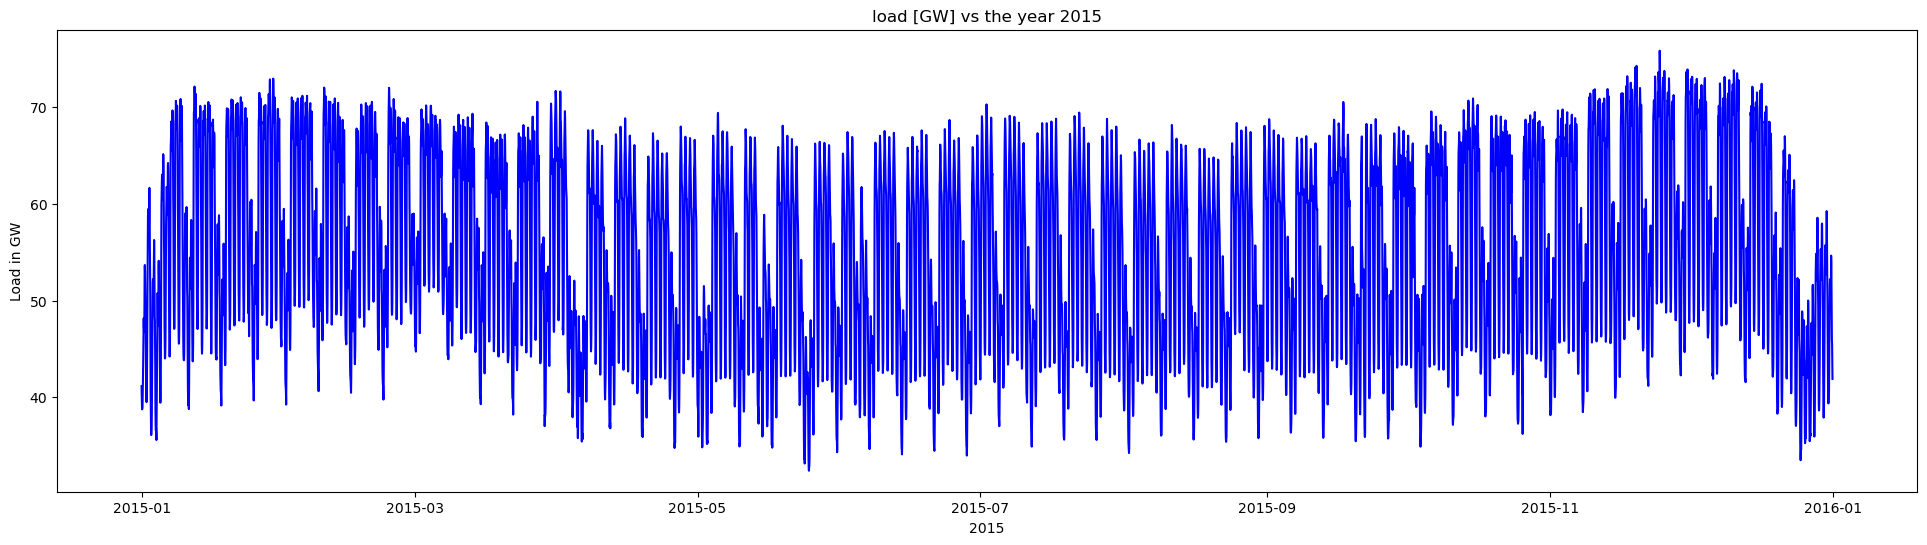

In [56]:
#task 2d(1)

times = pd.Series(filled_data['load [GW]'], index=filled_data.index)
plt.figure(figsize=(24, 6))
plt.plot(times, color='blue')
plt.title('load [GW] vs the year 2015')
plt.xlabel('2015')
plt.ylabel('Load in GW')
plt.show()

Text(0.5, 1.0, 'load[GW] VS augest 2015')

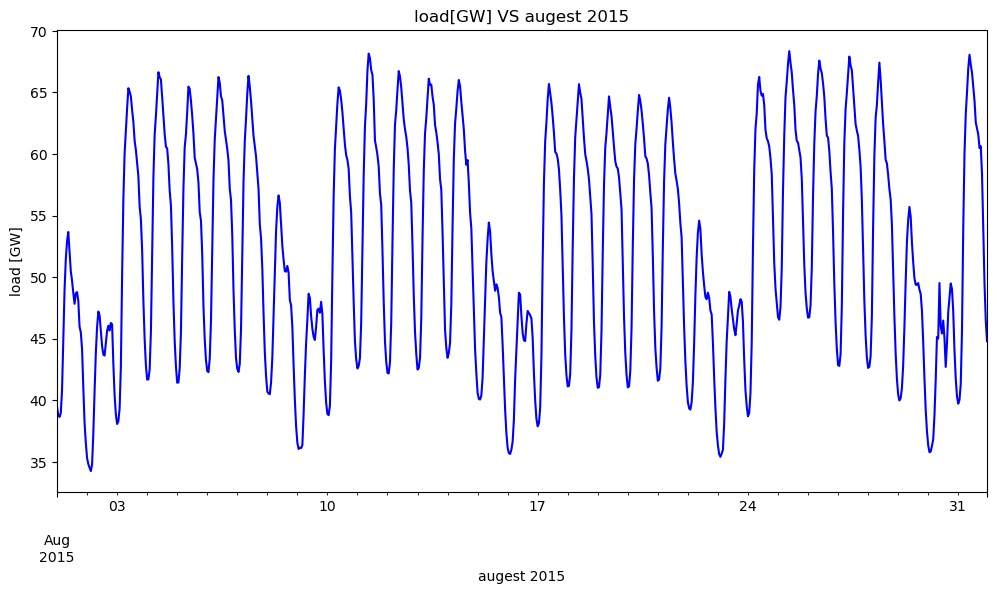

In [57]:
##task2e(1)
plt.figure(figsize=(12,6))
times.loc['2015-08'].plot(color="blue")
plt.xlabel('augest 2015')
plt.ylabel('load [GW]')
plt.title('load[GW] VS augest 2015')

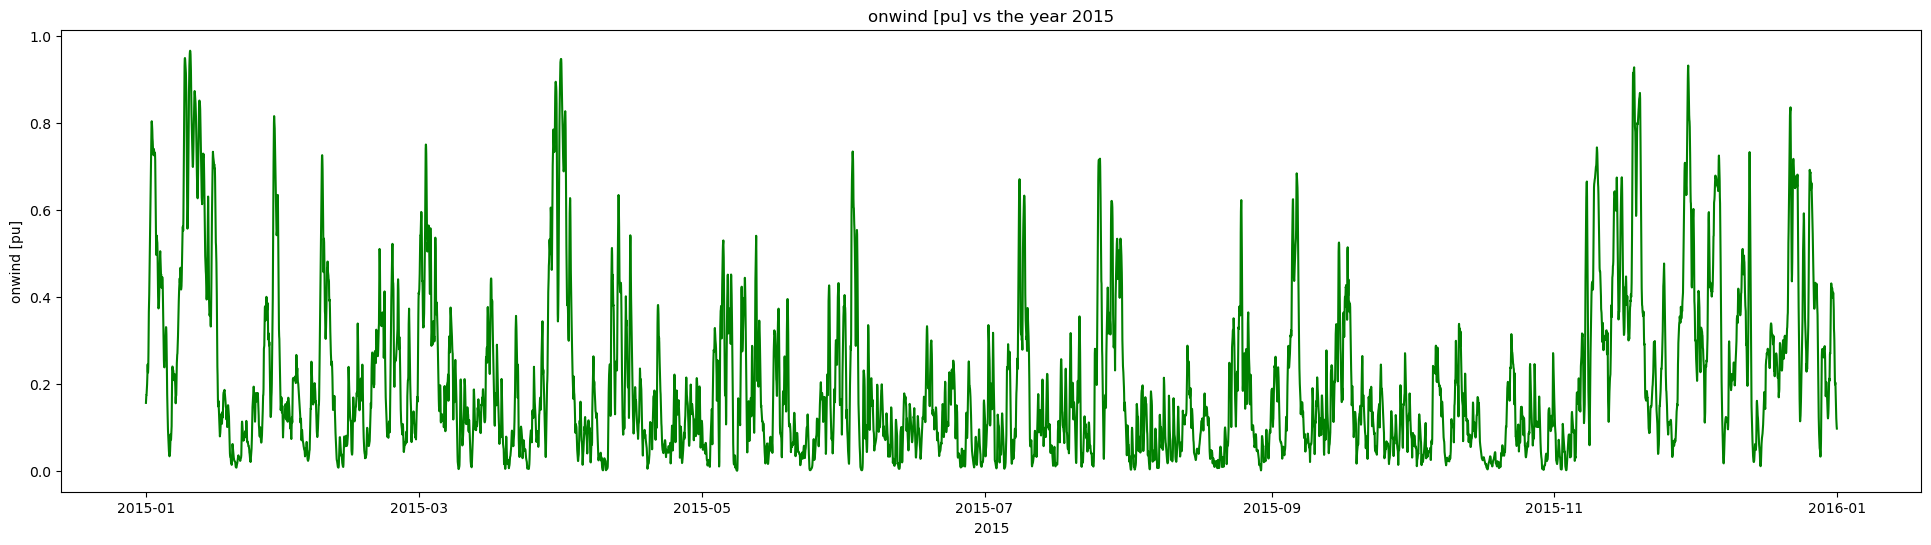

In [58]:
#task 2d(2)
times = pd.Series(filled_data['onwind [pu]'], index=filled_data.index)
plt.figure(figsize=(24, 6))
plt.plot(times, color='green')
plt.title('onwind [pu] vs the year 2015')
plt.xlabel('2015')
plt.ylabel('onwind [pu]')
plt.show()

Text(0.5, 1.0, 'onwind [pu] vs Aug-2015')

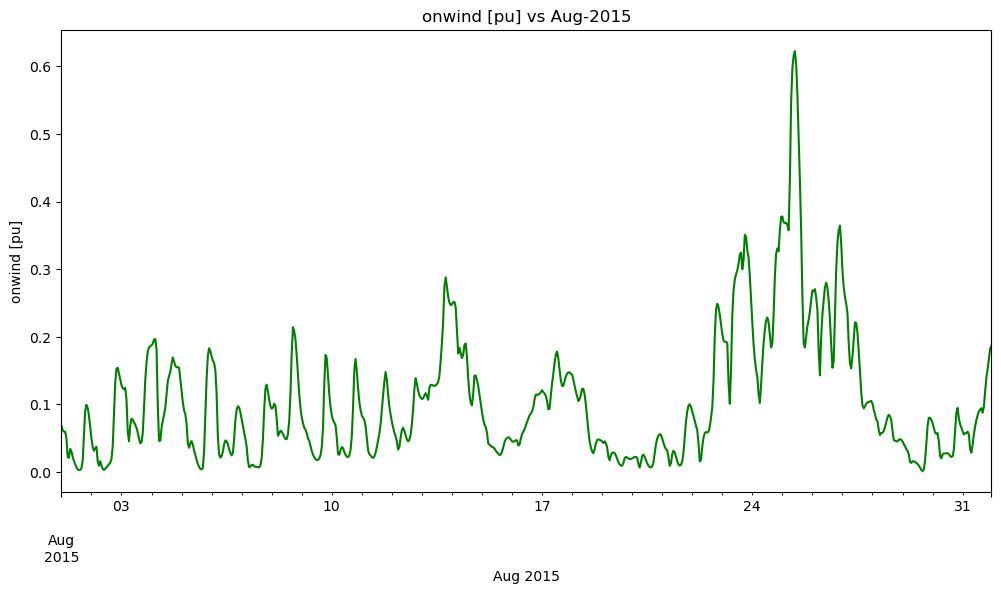

In [59]:
##task2e(2)
plt.figure(figsize=(12, 6))
times.loc['2015-08'].plot(color="green")
plt.xlabel('Aug 2015')
plt.ylabel('onwind [pu]')
plt.title('onwind [pu] vs Aug-2015')

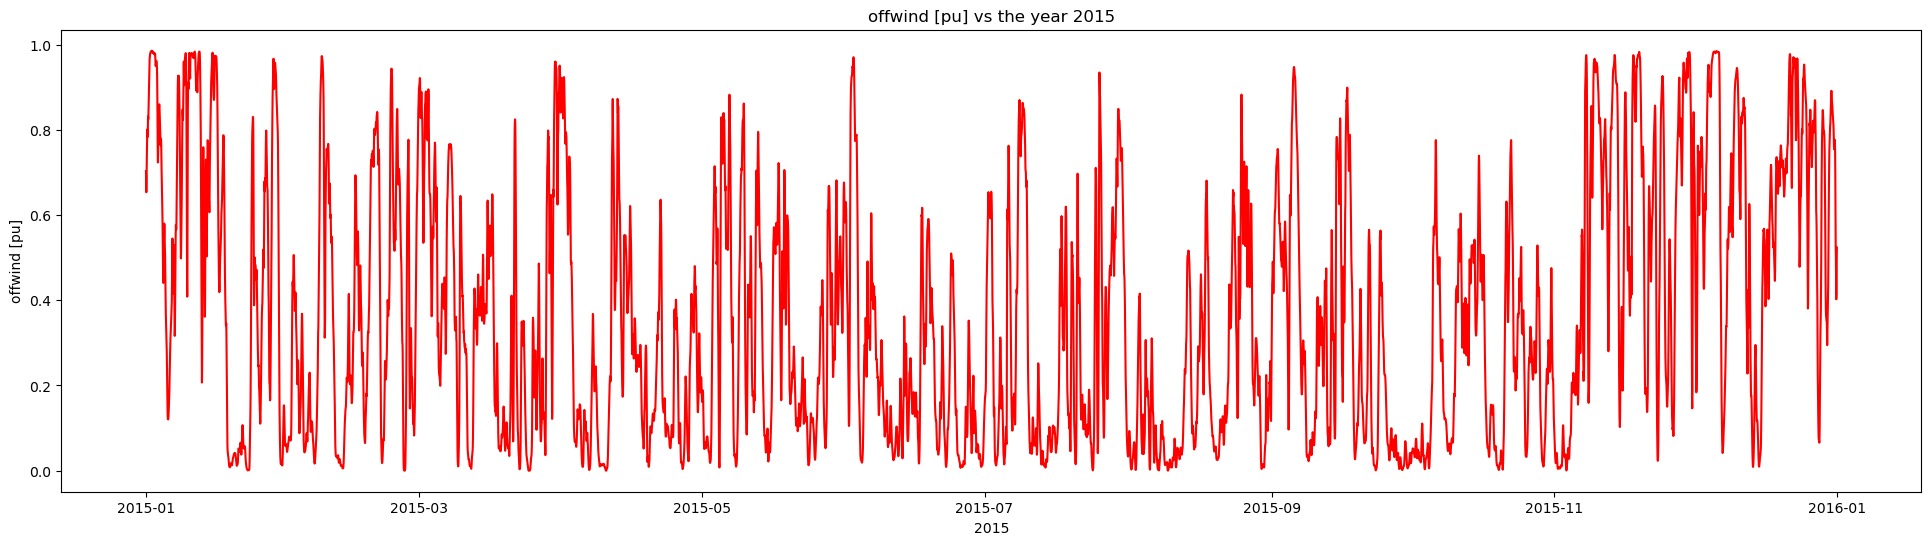

In [60]:
#task 2d(3)
times = pd.Series(filled_data['offwind [pu]'], index=filled_data.index)
plt.figure(figsize=(24, 6))
plt.plot(times, color='red')
plt.title('offwind [pu] vs the year 2015')
plt.xlabel('2015')
plt.ylabel('offwind [pu]')
plt.show()

Text(0.5, 1.0, 'offwind [pu] vs Aug-2015')

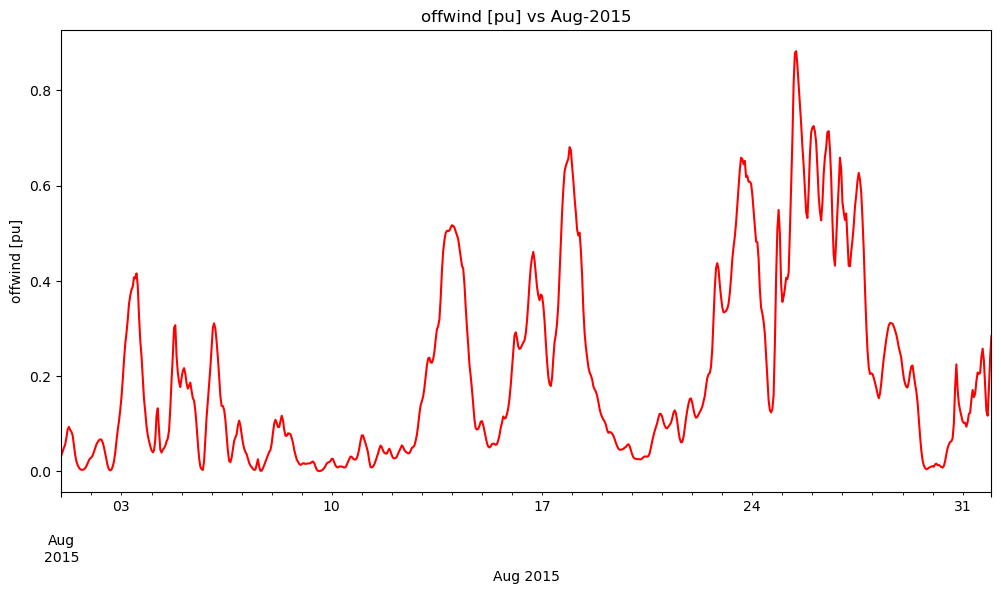

In [61]:
##task2e(3)
plt.figure(figsize=(12, 6))
times.loc['2015-08'].plot(color="red")
plt.xlabel('Aug 2015')
plt.ylabel('offwind [pu]')
plt.title('offwind [pu] vs Aug-2015')

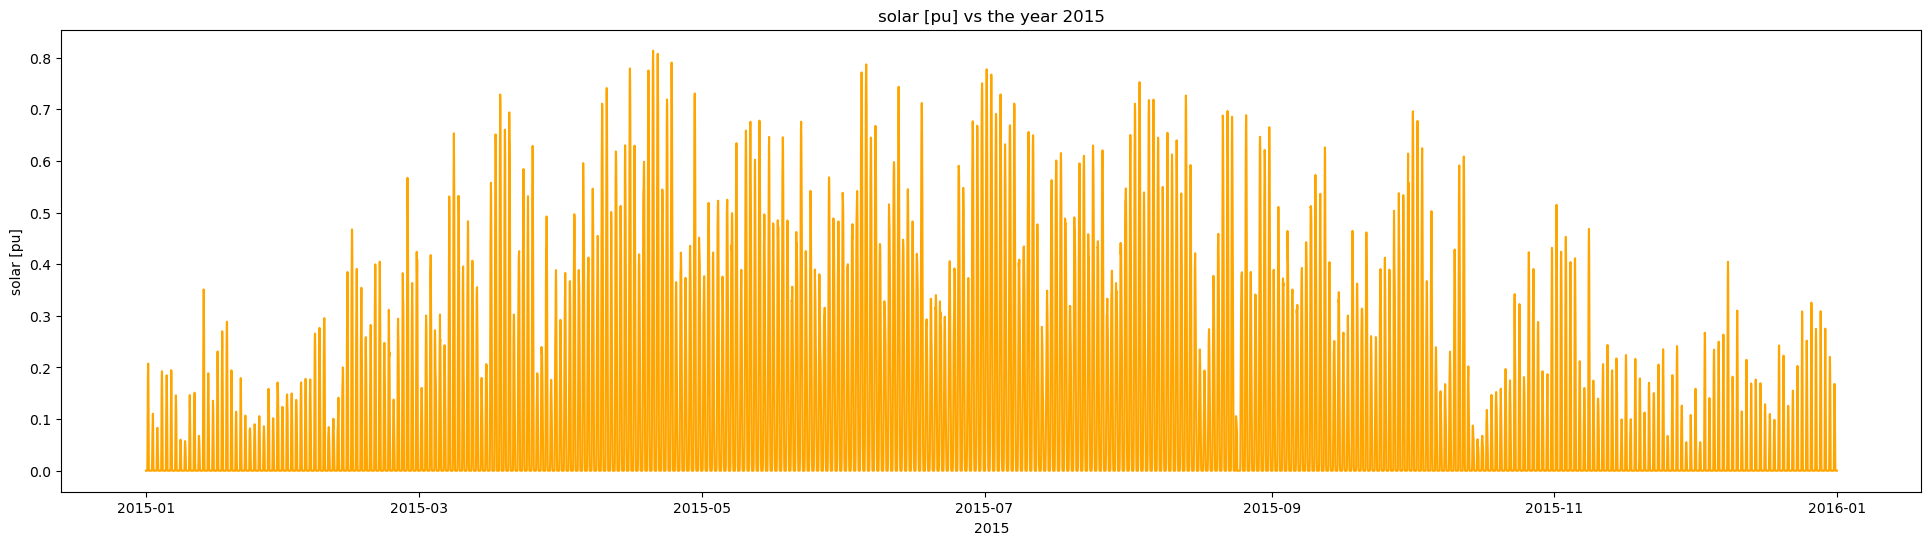

In [62]:
#task 2d(4)
times = pd.Series(filled_data['solar [pu]'], index=filled_data.index)
plt.figure(figsize=(24, 6))
plt.plot(times, color='orange')
plt.title('solar [pu] vs the year 2015')
plt.xlabel('2015')
plt.ylabel('solar [pu]')
plt.show()

Text(0.5, 1.0, 'solar [pu] vs Aug-2015')

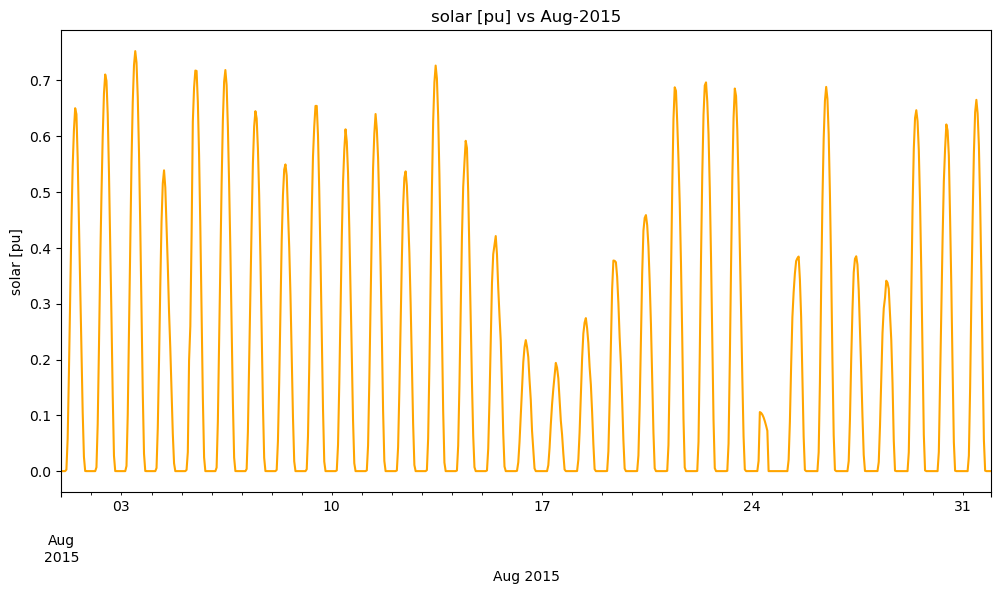

In [63]:
##task2e(4)
plt.figure(figsize=(12, 6))
times.loc['2015-08'].plot(color="orange")
plt.xlabel('Aug 2015')
plt.ylabel('solar [pu]')
plt.title('solar [pu] vs Aug-2015')


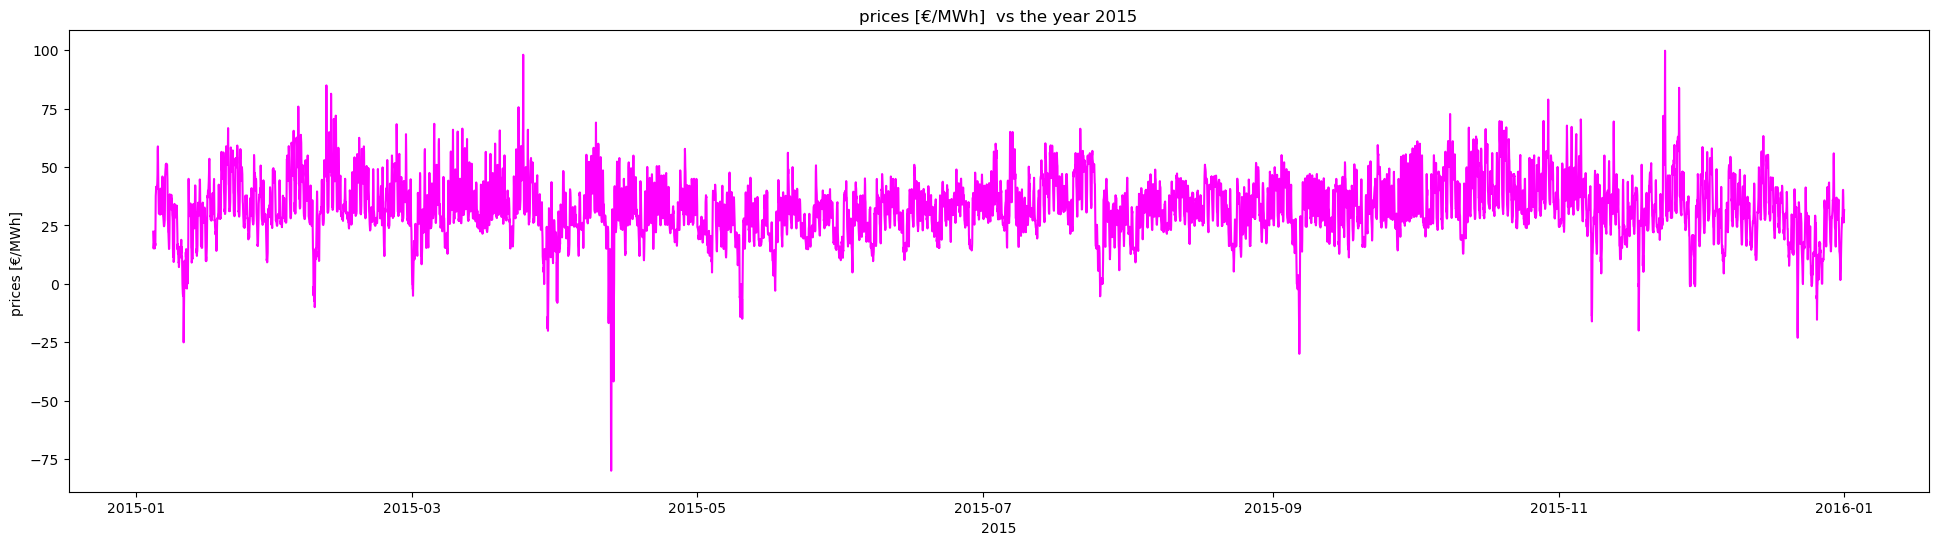

In [64]:
#task 2d(5)
times = pd.Series(filled_data['prices [€/MWh]'], index=filled_data.index)
plt.figure(figsize=(24, 6))
plt.plot(times, color='magenta')
plt.title('prices [€/MWh]  vs the year 2015')
plt.xlabel('2015')
plt.ylabel('prices [€/MWh] ')
plt.show()

Text(0, 0.5, 'prices [€/MWh]')

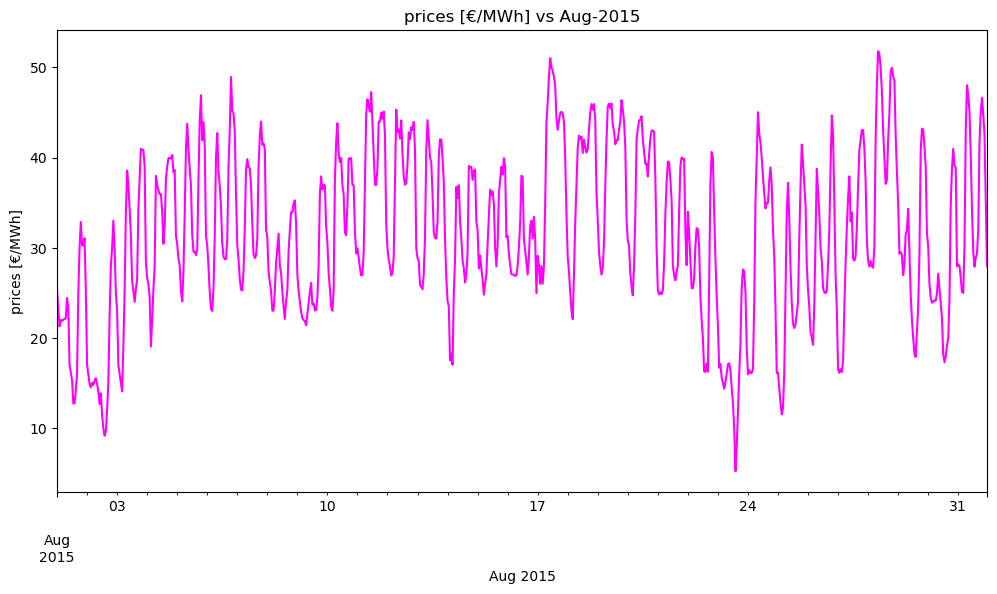

In [65]:
##task2e(5)
plt.figure(figsize=(12, 6))

times.loc['2015-08'].plot(color="magenta")
plt.title('prices [€/MWh] vs Aug-2015')
plt.xlabel('Aug 2015')
plt.ylabel('prices [€/MWh]')


/var/folders/d3/5j131h193zl4dd728sc732ym0000gn/T/ipykernel_17255/3791770864.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  time_series_monthly = filled_data.resample('M').mean()


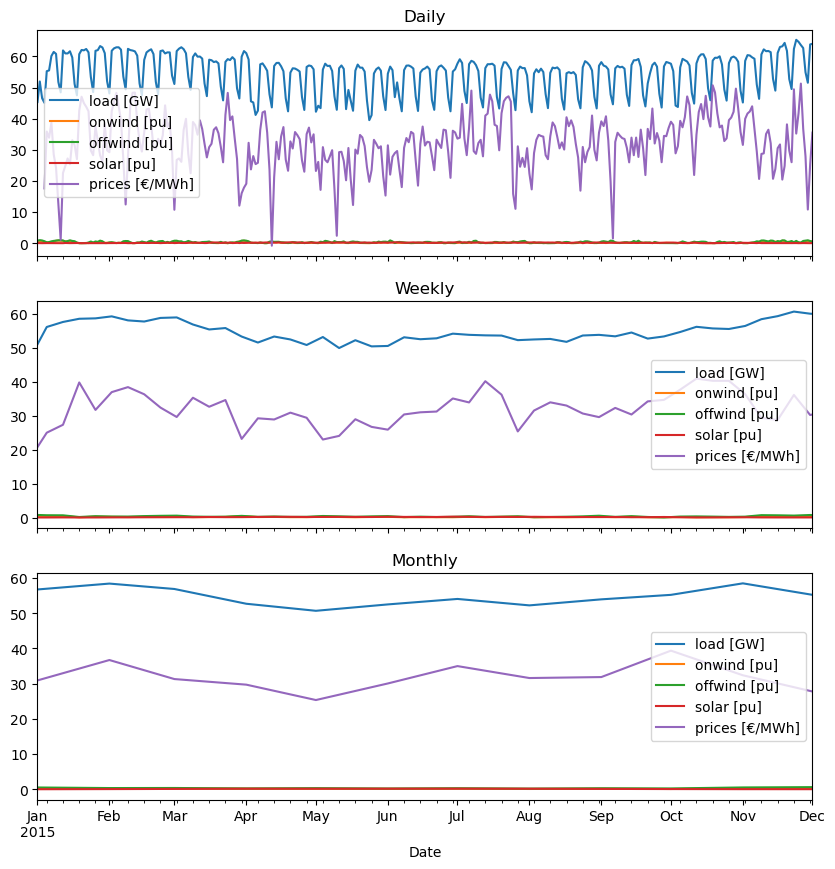

In [86]:
##task2f
filled_data.index = pd.to_datetime(filled_data.index) 

time_series_daily =filled_data.resample('D').mean()
time_series_weekly = filled_data.resample('W').mean()
time_series_monthly = filled_data.resample('M').mean()

fig, axs = plt.subplots(3, 1, figsize=(10, 10), sharex=True)

time_series_daily.plot(ax=axs[0], title='Daily')
time_series_weekly.plot(ax=axs[1], title='Weekly')
time_series_monthly.plot(ax=axs[2], title='Monthly')

axs[2].set_xlabel('Date')

plt.show()

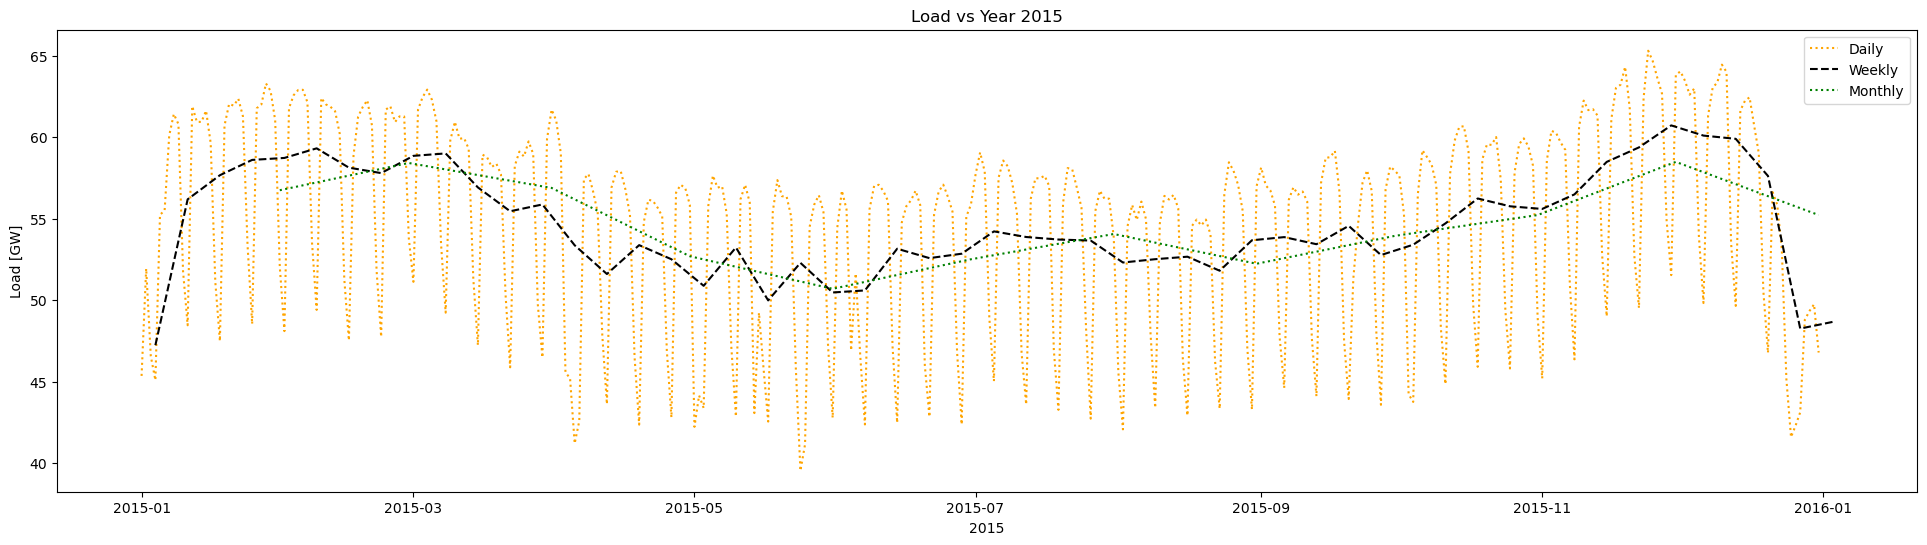

In [66]:
##task2f
##seperate grahs for each coloumn
times = pd.Series(filled_data['load [GW]'], index=filled_data.index)
tt_day = pd.date_range(start='2015-01-01', end='2015-12-31', freq='D')
tt_week = pd.date_range(start='2015-01-01', end='2016-01-03', freq='W')
tt_month = pd.date_range(start='2015-01-01', end='2015-12-31', freq='ME')
x = times.resample("D").mean()
y = times.resample("W").mean()
z = times.resample("ME").mean()

plt.figure(figsize=(24,6)) 
plt.plot(tt_day, x, 'orange', linestyle=':', label="Daily")
plt.plot(tt_week, y, 'black', linestyle='dashed', label="Weekly")
plt.plot(tt_month, z, 'green',linestyle='dotted', label="Monthly")
plt.legend(loc="upper right")
plt.xlabel('2015')
plt.ylabel('Load [GW]')
plt.title('Load vs Year 2015')
plt.show()

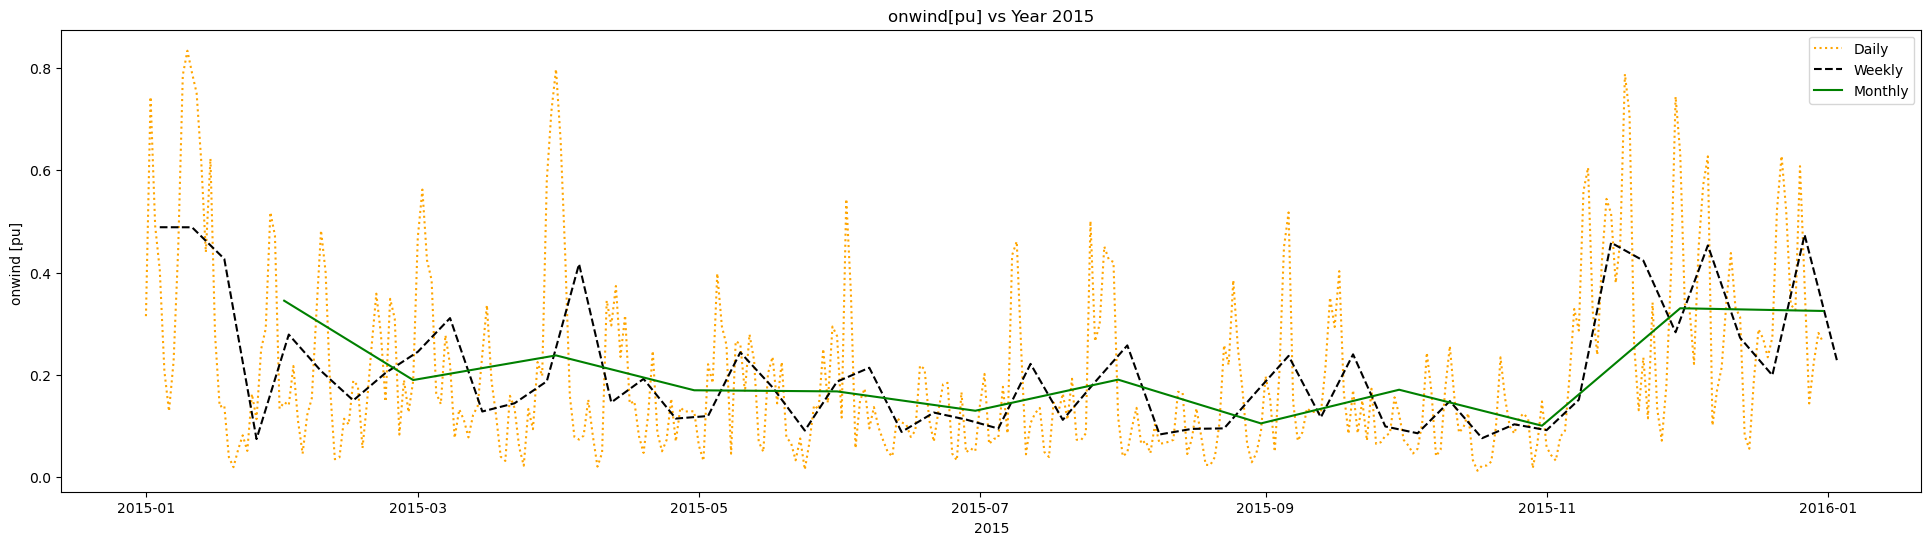

In [67]:
times = pd.Series(filled_data['onwind [pu]'], index=filled_data.index)
tt_day = pd.date_range(start='2015-01-01', end='2015-12-31', freq='D')
tt_week = pd.date_range(start='2015-01-01', end='2016-01-03', freq='W')
tt_month = pd.date_range(start='2015-01-01', end='2015-12-31', freq='ME')
x = times.resample("D").mean()
y = times.resample("W").mean()
z = times.resample("ME").mean()

plt.figure(figsize=(24,6)) 
plt.plot(tt_day, x, 'orange', linestyle=':', label="Daily")
plt.plot(tt_week, y, 'black', linestyle='dashed', label="Weekly")
plt.plot(tt_month, z, 'green', label="Monthly")
plt.legend(loc="upper right")
plt.xlabel('2015')
plt.ylabel('onwind [pu] ')
plt.title('onwind[pu] vs Year 2015')
plt.show()

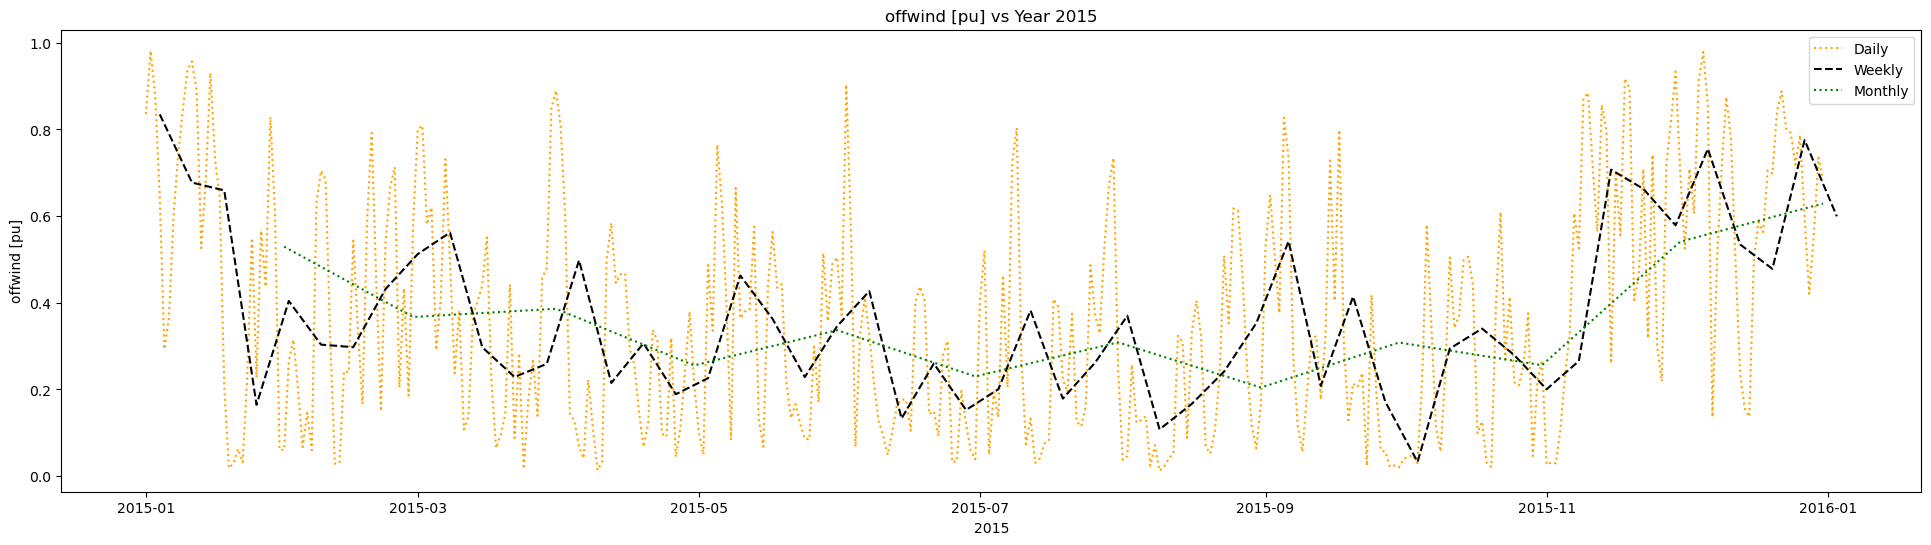

In [68]:
times = pd.Series(filled_data['offwind [pu]'], index=filled_data.index)
tt_day = pd.date_range(start='2015-01-01', end='2015-12-31', freq='D')
tt_week = pd.date_range(start='2015-01-01', end='2016-01-03', freq='W')
tt_month = pd.date_range(start='2015-01-01', end='2015-12-31', freq='ME')
x = times.resample("D").mean()
y = times.resample("W").mean()
z = times.resample("ME").mean()

plt.figure(figsize=(24,6)) 
plt.plot(tt_day, x, 'orange', linestyle=':', label="Daily")
plt.plot(tt_week, y, 'black', linestyle='dashed', label="Weekly")
plt.plot(tt_month, z, 'green',linestyle='dotted', label="Monthly")
plt.legend(loc="upper right")
plt.xlabel('2015')
plt.ylabel('offwind [pu]')
plt.title('offwind [pu] vs Year 2015')
plt.show()

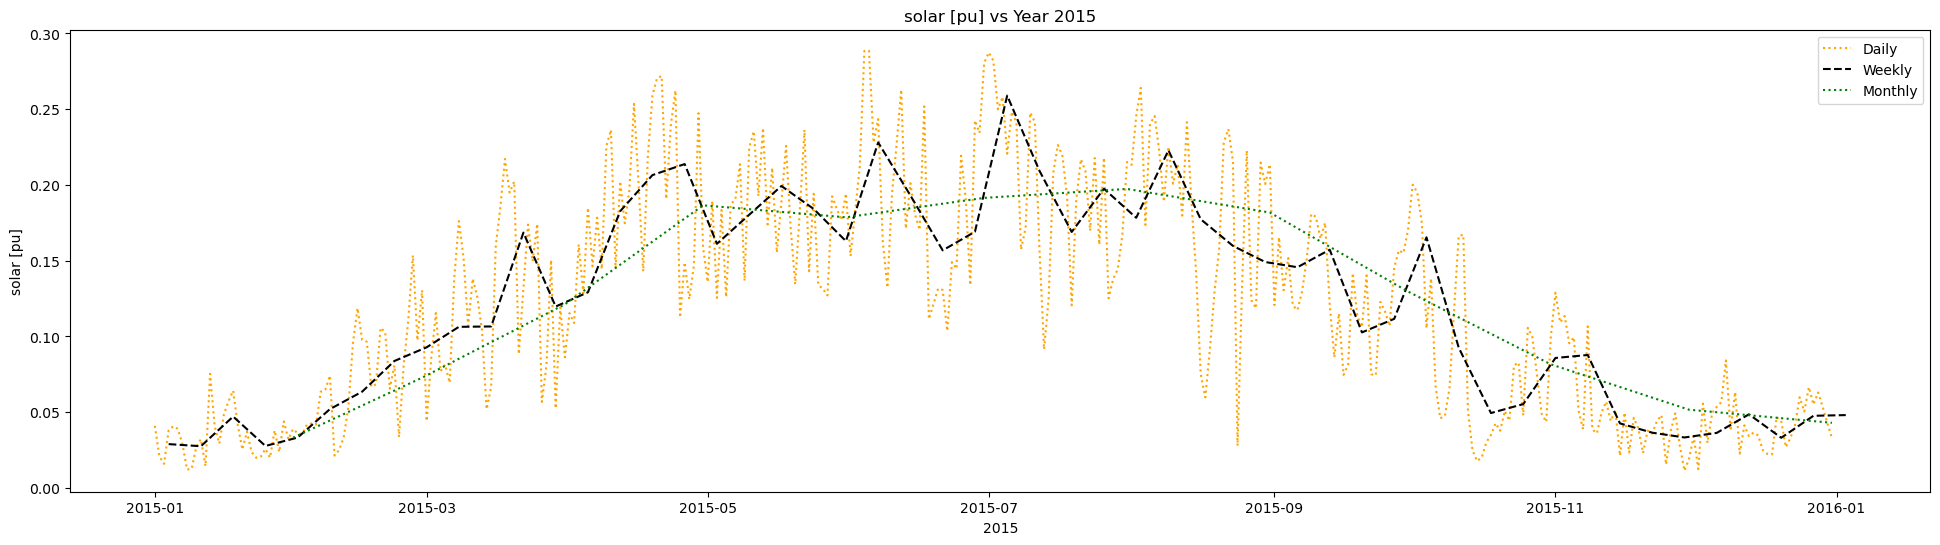

In [69]:
times = pd.Series(filled_data['solar [pu]'], index=filled_data.index)
tt_day = pd.date_range(start='2015-01-01', end='2015-12-31', freq='D')
tt_week = pd.date_range(start='2015-01-01', end='2016-01-03', freq='W')
tt_month = pd.date_range(start='2015-01-01', end='2015-12-31', freq='ME')
x = times.resample("D").mean()
y = times.resample("W").mean()
z = times.resample("ME").mean()

plt.figure(figsize=(24,6)) 
plt.plot(tt_day, x, 'orange', linestyle=':', label="Daily")
plt.plot(tt_week, y, 'black', linestyle='dashed', label="Weekly")
plt.plot(tt_month, z, 'green',linestyle='dotted', label="Monthly")
plt.legend(loc="upper right")
plt.xlabel('2015')
plt.ylabel('solar [pu]')
plt.title('solar [pu] vs Year 2015')
plt.show()

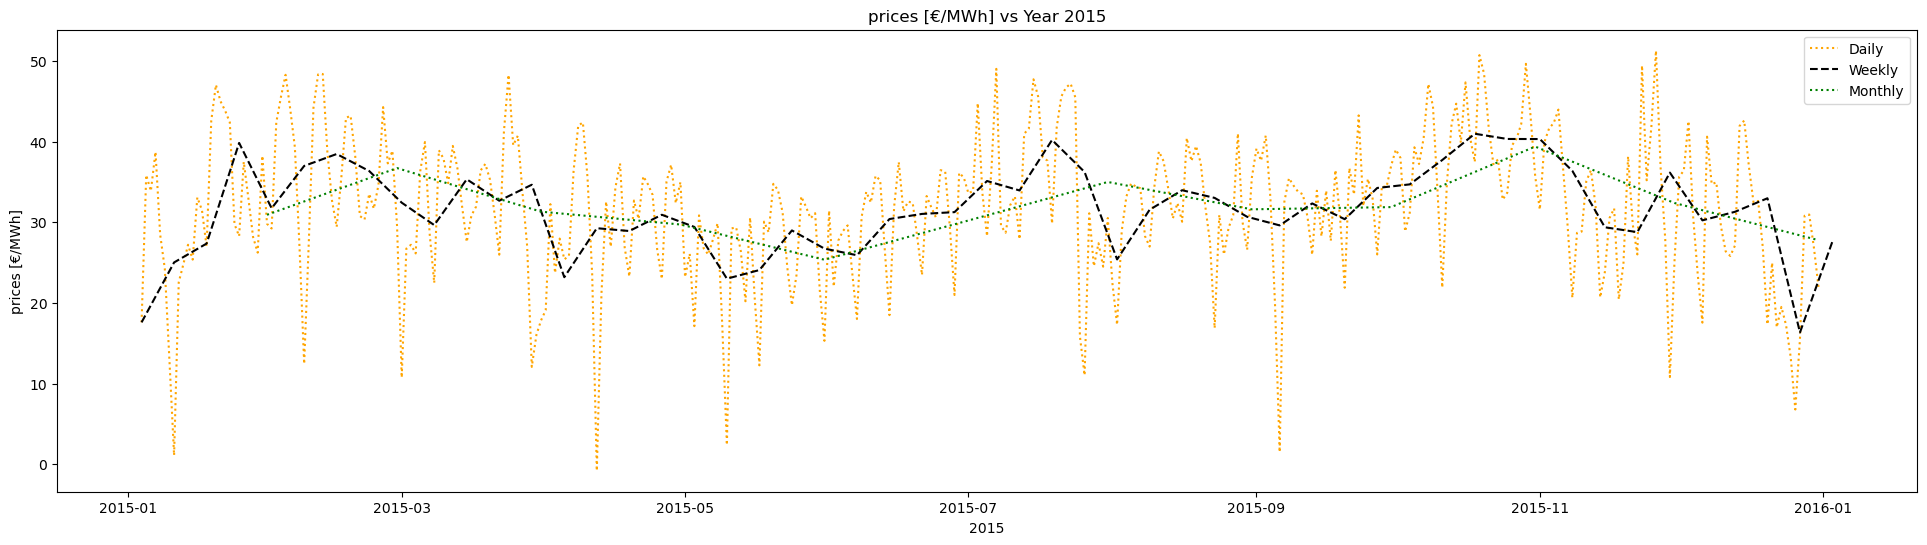

In [70]:
times = pd.Series(filled_data['prices [€/MWh]'], index=filled_data.index)
tt_day = pd.date_range(start='2015-01-01', end='2015-12-31', freq='D')
tt_week = pd.date_range(start='2015-01-01', end='2016-01-03', freq='W')
tt_month = pd.date_range(start='2015-01-01', end='2015-12-31', freq='ME')
x = times.resample("D").mean()
y = times.resample("W").mean()
z = times.resample("ME").mean()

plt.figure(figsize=(24,6)) 
plt.plot(tt_day, x, 'orange', linestyle=':', label="Daily")
plt.plot(tt_week, y, 'black', linestyle='dashed', label="Weekly")
plt.plot(tt_month, z, 'green',linestyle='dotted', label="Monthly")
plt.legend(loc="upper right")
plt.xlabel('2015')
plt.ylabel('prices [€/MWh]')
plt.title('prices [€/MWh] vs Year 2015')
plt.show()

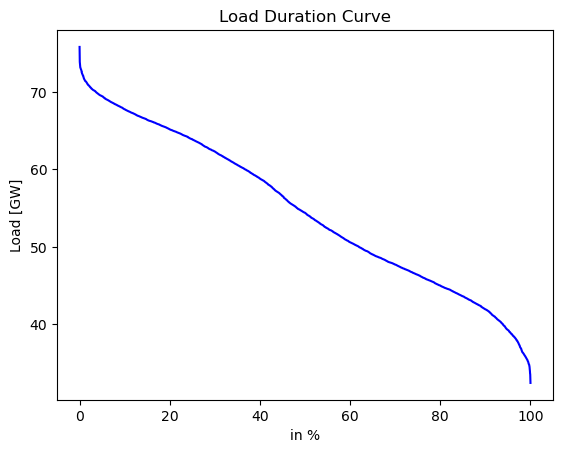

In [71]:
##task2g
xx = filled_data['load [GW]']
w = np.linspace(0, 100, 8760)
xx= xx.sort_values(ascending=False).reset_index(drop=True)
plt.plot(w, xx, color="blue")
plt.xlabel('in %')
plt.ylabel('Load [GW]')
plt.title('Load Duration Curve')
plt.show()

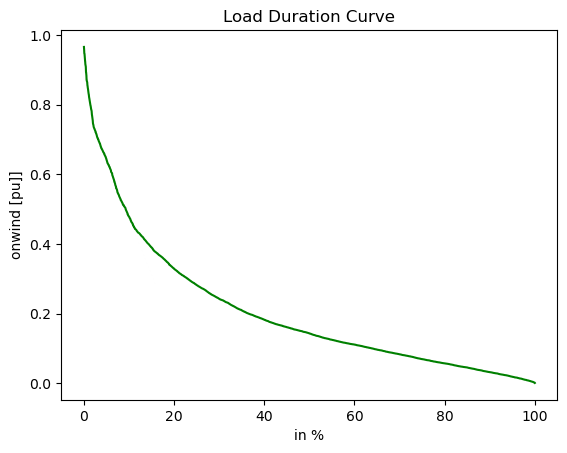

In [72]:
xx = filled_data['onwind [pu]']
w = np.linspace(0, 100, 8760)
xx= xx.sort_values(ascending=False).reset_index(drop=True)
plt.plot(w, xx, color="green")
plt.xlabel('in %')
plt.ylabel('onwind [pu]]')
plt.title('Load Duration Curve')
plt.show()

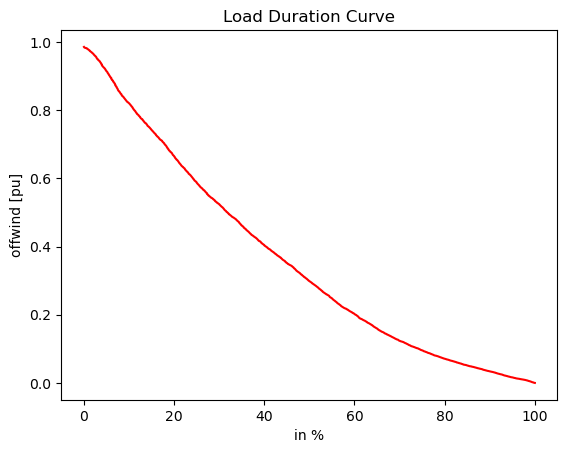

In [73]:
xx = filled_data['offwind [pu]']
w = np.linspace(0, 100, 8760)
xx= xx.sort_values(ascending=False).reset_index(drop=True)
plt.plot(w, xx, color="red")
plt.xlabel('in %')
plt.ylabel('offwind [pu]')
plt.title('Load Duration Curve')
plt.show()

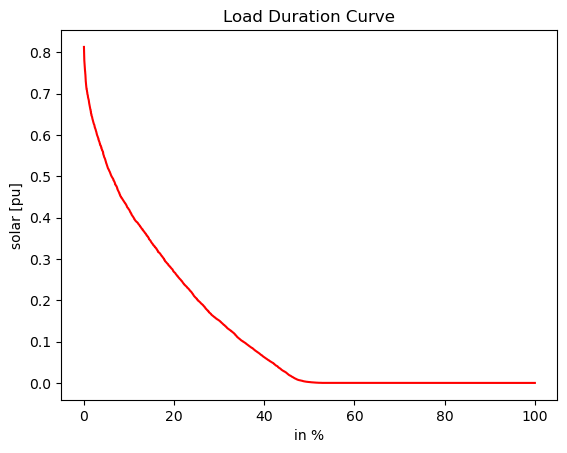

In [74]:
xx = filled_data['solar [pu]']
w = np.linspace(0, 100, 8760)
xx= xx.sort_values(ascending=False).reset_index(drop=True)
plt.plot(w, xx, color="red")
plt.xlabel('in %')
plt.ylabel('solar [pu]')
plt.title('Load Duration Curve')
plt.show()

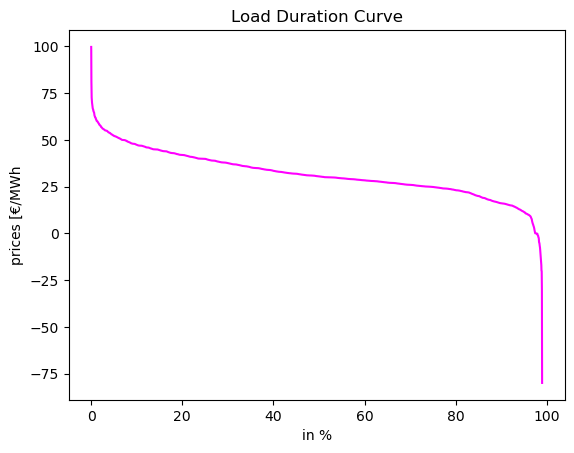

In [75]:
xx = filled_data['prices [€/MWh]']
w = np.linspace(0, 100, 8760)
xx= xx.sort_values(ascending=False).reset_index(drop=True)
plt.plot(w, xx, color="magenta")
plt.xlabel('in %')
plt.ylabel('prices [€/MWh')
plt.title('Load Duration Curve')
plt.show()

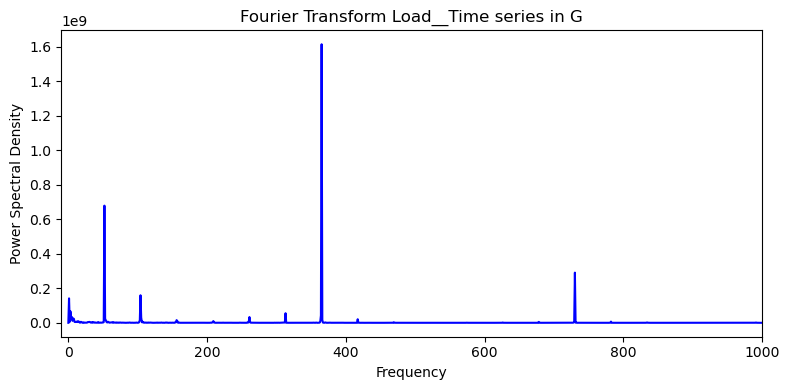

In [76]:
##task 2h
Fourier_Transform_data = 'load [GW]'
fig, cx = plt.subplots(ncols=1, figsize=(8, 4), tight_layout=True)
d= abs(pd.Series(np.fft.rfft(filled_data[Fourier_Transform_data] - filled_data[Fourier_Transform_data].mean()), index=np.fft.rfftfreq(len(filled_data[Fourier_Transform_data ]), d=1./8760))**2)
cx.plot(d, color = "blue")
cx.set_xlabel('Frequency')
cx.set_ylabel('Power Spectral Density')
cx.set_xlim(-10, 1000)
plt.title('Fourier Transform Load__Time series in G')
plt.show()


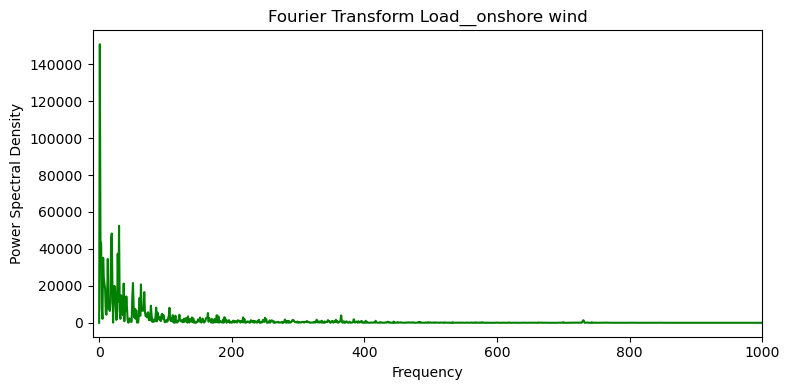

In [77]:
Fourier_Transform_data = 'onwind [pu]'
fig, cx = plt.subplots(ncols=1, figsize=(8, 4), tight_layout=True)
d = abs(pd.Series(np.fft.rfft(filled_data[Fourier_Transform_data] - filled_data[Fourier_Transform_data].mean()), index=np.fft.rfftfreq(len(filled_data[Fourier_Transform_data ]), d=1./8760))**2)
cx.plot(d, color = "green")
cx.set_xlabel('Frequency')
cx.set_ylabel('Power Spectral Density')
cx.set_xlim(-10, 1000)
plt.title('Fourier Transform Load__onshore wind')
plt.show()


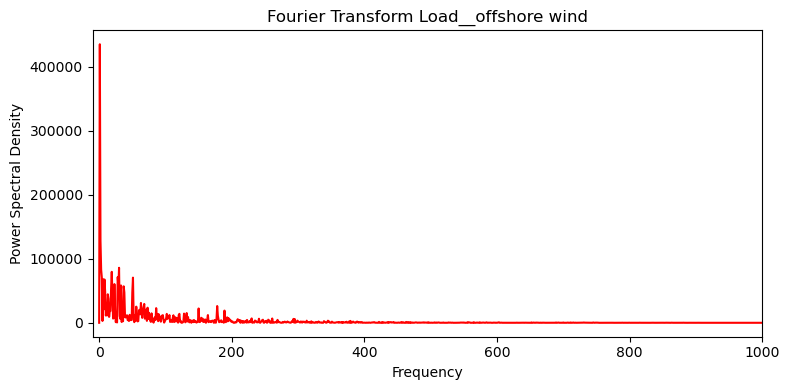

In [78]:
Fourier_Transform_data = 'offwind [pu]'
fig, cx = plt.subplots(ncols=1, figsize=(8, 4), tight_layout=True)
d = abs(pd.Series(np.fft.rfft(filled_data[Fourier_Transform_data] - filled_data[Fourier_Transform_data].mean()), index=np.fft.rfftfreq(len(filled_data[Fourier_Transform_data ]), d=1./8760))**2)
cx.plot(d, color = "red")
cx.set_xlabel('Frequency')
cx.set_ylabel('Power Spectral Density')
cx.set_xlim(-10, 1000)
plt.title('Fourier Transform Load__offshore wind')
plt.show()


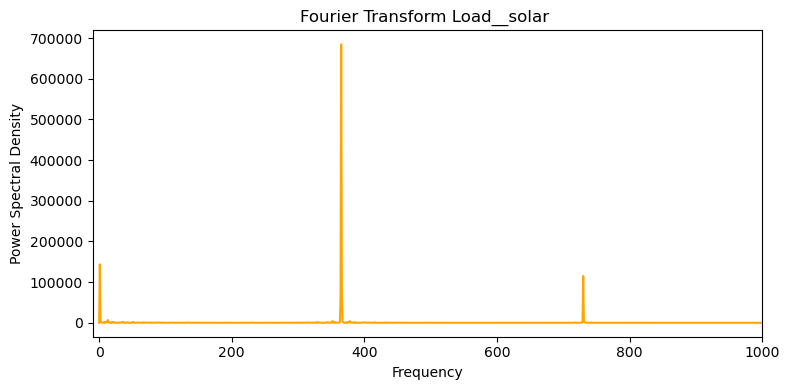

In [79]:
Fourier_Transform_data = 'solar [pu]'
fig, cx = plt.subplots(ncols=1, figsize=(8, 4), tight_layout=True)
d = abs(pd.Series(np.fft.rfft(filled_data[Fourier_Transform_data] - filled_data[Fourier_Transform_data].mean()), index=np.fft.rfftfreq(len(filled_data[Fourier_Transform_data ]), d=1./8760))**2)
cx.plot(d, color = "orange")
cx.set_xlabel('Frequency')
cx.set_ylabel('Power Spectral Density')
cx.set_xlim(-10, 1000)
plt.title('Fourier Transform Load__solar ')
plt.show()